## > Как подключиться к PostgreSQL через pandas

В следующих заданиях мы будем работать с базой данных, в которой имеется три таблицы:

#### 1. Таблица с данными о пользователях (user):

    id - уникальный идентификатор пользователя (primary key)

    gender - пол

    age - возраст

    country - страна

    city - город

    exp_group - экспериментальная группа

    os - операционная система

    source - источник трафика

#### 2. Таблица с данными о постах (post):

    id - уникальный идентификатор поста (primary key)

    text - текст поста

    topic - тема поста

#### 3. Таблица с данными о действиях пользователей (feed_action):

    user_id (——>) user (id)- идентификатор пользователя     

    post_id (——>) post (id)- идентификатор поста     

    action - совершенное в сети действие     

    time- время действия

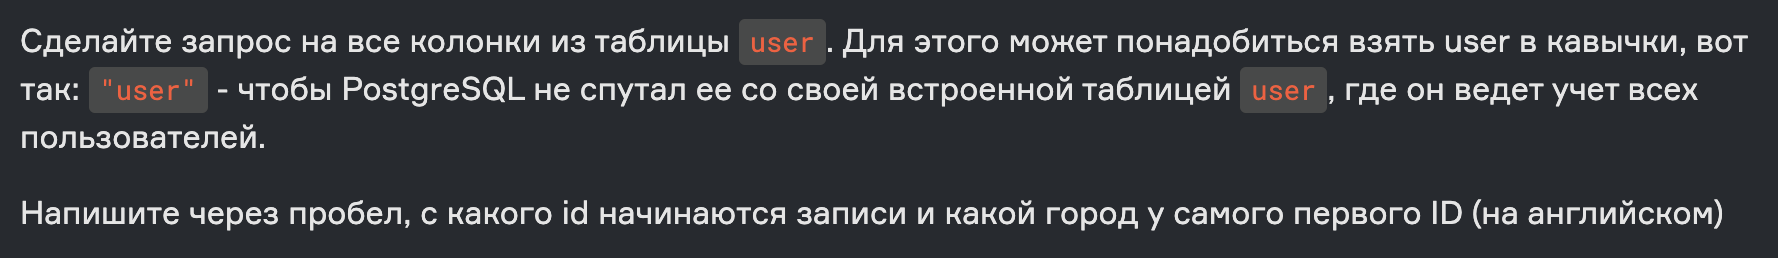

In [52]:
import psycopg2 as ps
import pandas as pd

connection = ps.connect(
    database="startml",
    user="robot-startml-ro",
    password="pheiph0hahj1Vaif",
    host="postgres.lab.karpov.courses",
    port=6432
)
cursor = connection.cursor()

cursor.execute(
    """
    SELECT *
    FROM "user"
    ORDER BY id
    LIMIT 1;
    """)
result = cursor.fetchall()

for row in result:
    print(row)



(200, 1, 34, 'Russia', 'Degtyarsk', 3, 'Android', 'ads')


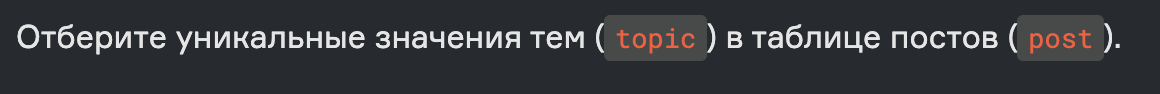

In [22]:
cursor.execute(
    """
    SELECT DISTINCT topic
    FROM post
    """)
result = cursor.fetchall()

for row in result:
    print(row)
len(result)


('tech',)
('covid',)
('movie',)
('entertainment',)
('politics',)
('sport',)
('business',)


7

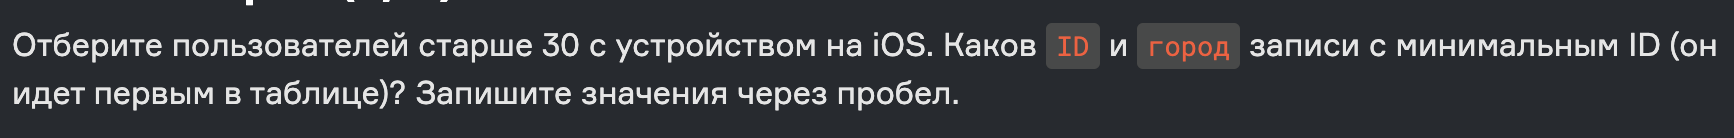

In [30]:
cursor.execute(
    """
    SELECT *
    FROM "user"
    WHERE os = 'iOS' AND age>'30'
    LIMIT 1;
    """)
result = cursor.fetchall()

for row in result:
    print(row)

(212, 1, 47, 'Russia', 'Podolsk', 0, 'iOS', 'ads')


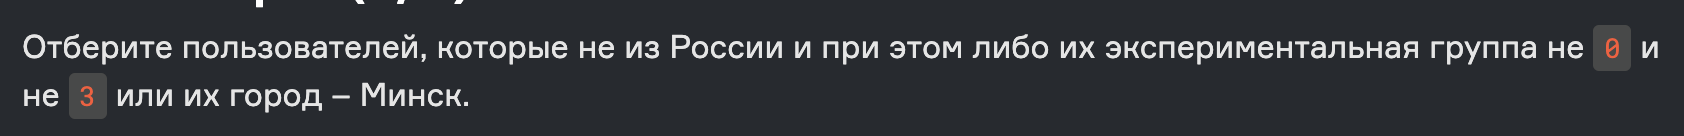

In [43]:
cursor.execute(
    """
    SELECT *
    FROM "user"
    WHERE country != 'Russia'
    AND (exp_group NOT IN (0, 3)) OR city = 'Minsk'
    LIMIT 4;
    """)
result = cursor.fetchall()

for row in result:
    print(row)

(211, 1, 22, 'Belarus', 'Minsk', 0, 'iOS', 'ads')
(213, 1, 22, 'Ukraine', 'Kamianske', 2, 'iOS', 'ads')
(216, 0, 38, 'Ukraine', 'Lviv', 1, 'Android', 'ads')
(218, 1, 25, 'Belarus', 'Minsk', 2, 'iOS', 'ads')


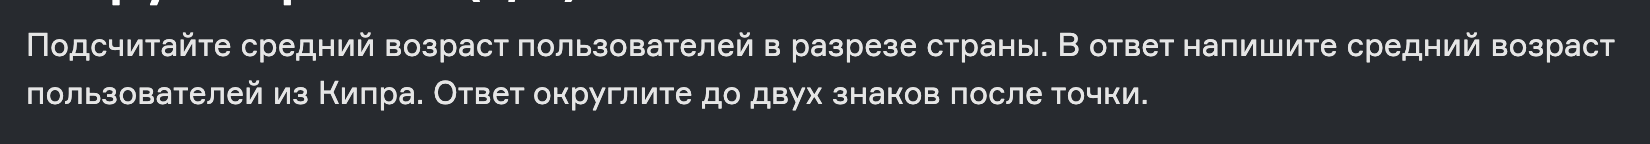

In [55]:
cursor.execute(
    """
    SELECT AVG(age) as age
    FROM "user"
    WHERE country = 'Cyprus'
    LIMIT 4;
    """)
result = cursor.fetchall()

for row in result:
    print(row)

(Decimal('28.0705882352941176'),)


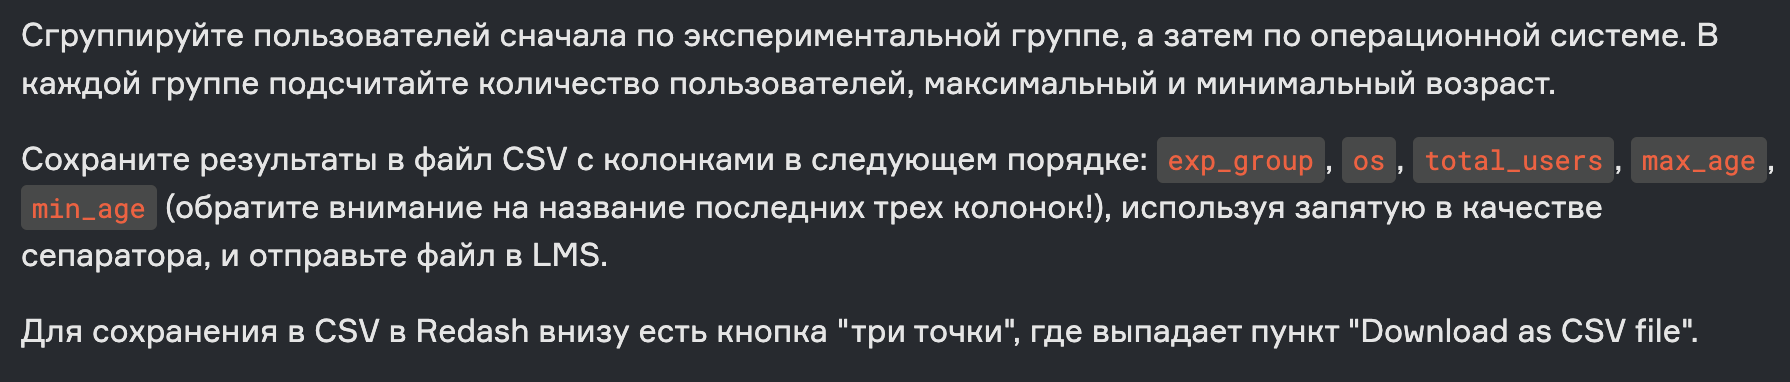

In [64]:
cursor.execute(
    """
    SELECT 
        exp_group,
        os,
        COUNT(*) AS user_count,
        MAX(age) AS max_age,
        MIN(age) AS min_age
    FROM "user"
    GROUP BY exp_group, os
    ORDER BY exp_group, os;
    """)
result = cursor.fetchall()
df = pd.DataFrame(result, columns=['exp_group','os','total_users','max_age','min_age'])
df.to_csv('exp_group.csv', sep=',', index=False)

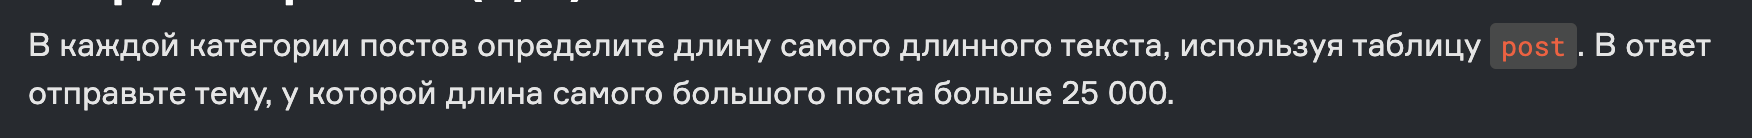

In [74]:
cursor.execute(
    """
     SELECT topic
        FROM post
        GROUP BY topic
        HAVING MAX(LENGTH(text)) > 25000;
    """)
result = cursor.fetchall()

for row in result:
    print(row)

('politics',)


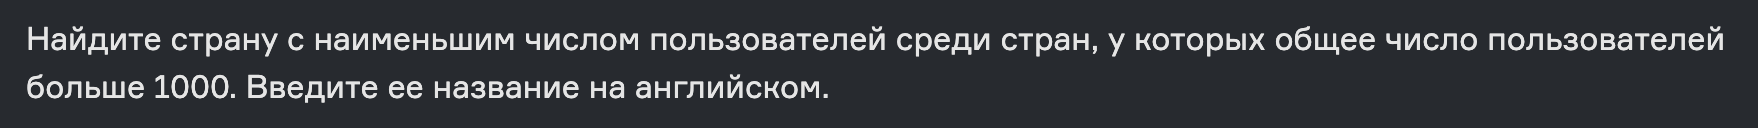

In [85]:
cursor.execute(
    """
    SELECT country, COUNT(*) AS user_count
    FROM "user"
    GROUP BY country
    HAVING COUNT(*)>1000
    ORDER BY user_count
    """)
result = cursor.fetchall()

for row in result:
    print(row)

('Azerbaijan', 1542)
('Finland', 1599)
('Turkey', 1606)
('Kazakhstan', 3172)
('Belarus', 3293)
('Ukraine', 8273)
('Russia', 143035)


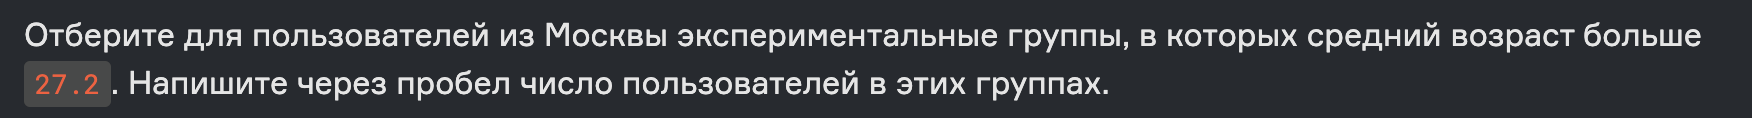

In [86]:
cursor.execute(
    """
    SELECT exp_group, AVG(age) as age, COUNT(*) AS user_count
    FROM "user"
    WHERE city = 'Moscow'
    GROUP BY exp_group
    HAVING AVG(age)>27.2
    """)
result = cursor.fetchall()

for row in result:
    print(row)

(1, Decimal('27.3251019483461713'), 4414)
(3, Decimal('27.3142987665600731'), 4378)


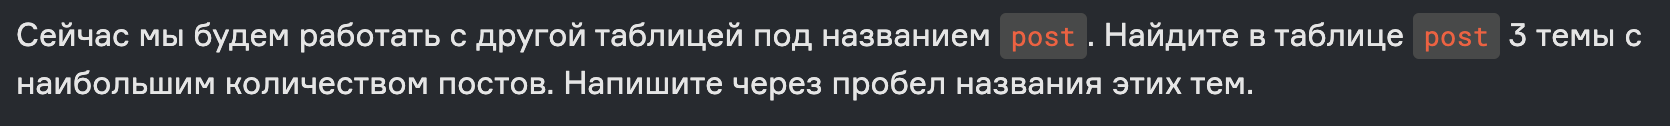

In [88]:
cursor.execute(
    """
    SELECT topic, COUNT(*) as post_count
    FROM post
    GROUP BY topic
    ORDER BY post_count DESC
    """)
result = cursor.fetchall()

for row in result:
    print(row)

('movie', 3000)
('covid', 1799)
('business', 510)
('sport', 510)
('politics', 417)
('tech', 401)
('entertainment', 386)


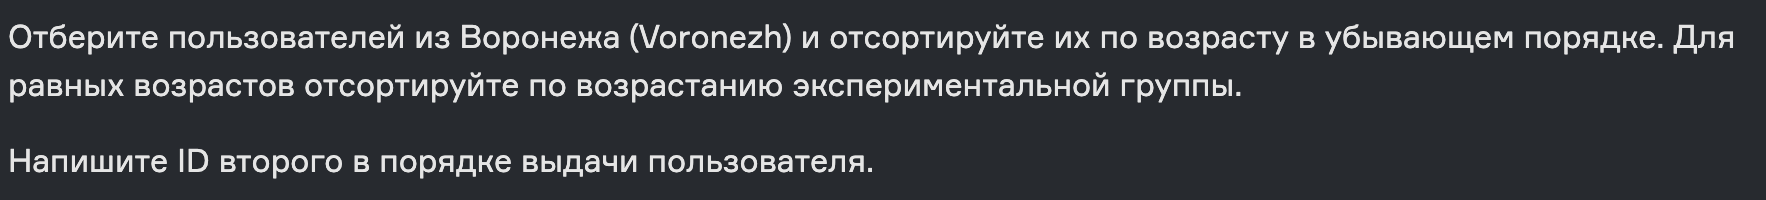

In [94]:
cursor.execute(
    """
    SELECT id
    FROM "user"
    WHERE city = 'Voronezh'
    ORDER BY age DESC, exp_group ASC
    LIMIT 2;
    """)
result = cursor.fetchall()
for row in result:
    print(row)

(89990,)
(2441,)


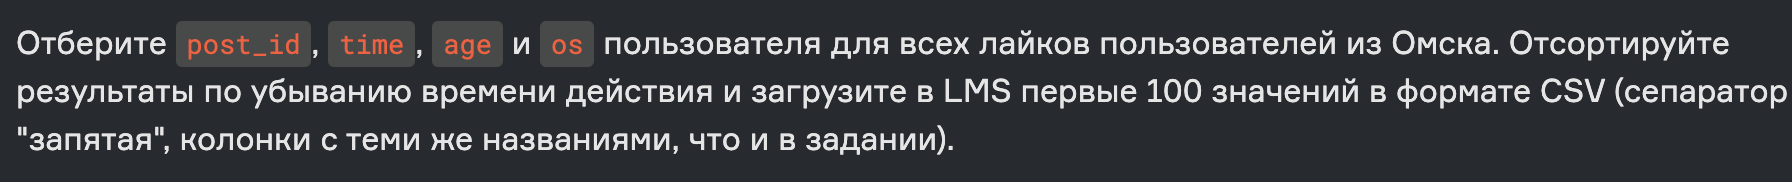

In [9]:
# Выполняем SQL-запрос
cursor.execute(
    """
    SELECT p.id AS post_id, f.time AS time, u.age AS age, u.os AS os
    FROM "user" u
    JOIN "feed_action" f ON f.user_id = u.id
    JOIN "post" p ON  p.id = f.post_id
    WHERE u.city = 'Omsk' AND f.action = 'like'
    ORDER BY f.time DESC
    LIMIT 100;
    """
)

# Извлекаем все результаты
result = cursor.fetchall()
df = pd.DataFrame(result, columns=['post_id','time','age','os'])
df.to_csv('post_id.csv', sep=',', index=False)
for row in result:
    print(row)

(7159, datetime.datetime(2022, 1, 26, 23, 59, 54), 17, 'Android')
(7184, datetime.datetime(2022, 1, 26, 23, 56, 30), 17, 'Android')
(7265, datetime.datetime(2022, 1, 26, 23, 56, 3), 17, 'Android')
(7256, datetime.datetime(2022, 1, 26, 23, 55, 24), 17, 'Android')
(7080, datetime.datetime(2022, 1, 26, 23, 55, 12), 17, 'Android')
(7163, datetime.datetime(2022, 1, 26, 23, 54, 36), 20, 'iOS')
(7174, datetime.datetime(2022, 1, 26, 23, 54, 29), 20, 'iOS')
(7315, datetime.datetime(2022, 1, 26, 23, 54, 28), 20, 'iOS')
(7280, datetime.datetime(2022, 1, 26, 23, 54, 19), 22, 'Android')
(6943, datetime.datetime(2022, 1, 26, 23, 52, 29), 20, 'iOS')
(7242, datetime.datetime(2022, 1, 26, 23, 52, 1), 20, 'iOS')
(7192, datetime.datetime(2022, 1, 26, 23, 51, 36), 22, 'Android')
(7251, datetime.datetime(2022, 1, 26, 23, 50, 50), 22, 'Android')
(7184, datetime.datetime(2022, 1, 26, 23, 50, 42), 20, 'iOS')
(7168, datetime.datetime(2022, 1, 26, 23, 50, 7), 22, 'Android')
(7213, datetime.datetime(2022, 1, 26,

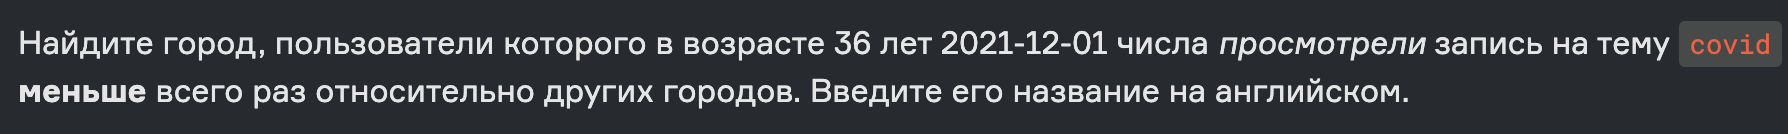

1) Выбираем город и подсчитываем его кол-во просмотров
2) Используем таблицу user
3) Соединяем необходимые таблицы
4) Выставляем все условия
5) Группируем по городу
6) Фильтруем по кол-ву просмотров

In [18]:
cursor.execute(
    """
    SELECT u.city, COUNT(*) AS view_count
    FROM "user" u
    JOIN "feed_action" f ON f.user_id = u.id
    JOIN "post" p ON p.id = f.post_id
    WHERE u.age = '36' 
      AND f.time::date = '2021-12-01' 
      AND p.topic = 'covid' 
      AND f.action = 'view'
    GROUP BY u.city
    ORDER BY view_count ASC
    LIMIT 1;

    """
)## есть условие, которое игнорирует время

# Извлекаем все результаты
result = cursor.fetchall()
for row in result:
    print(row)


('Arkhangelsk', 5)


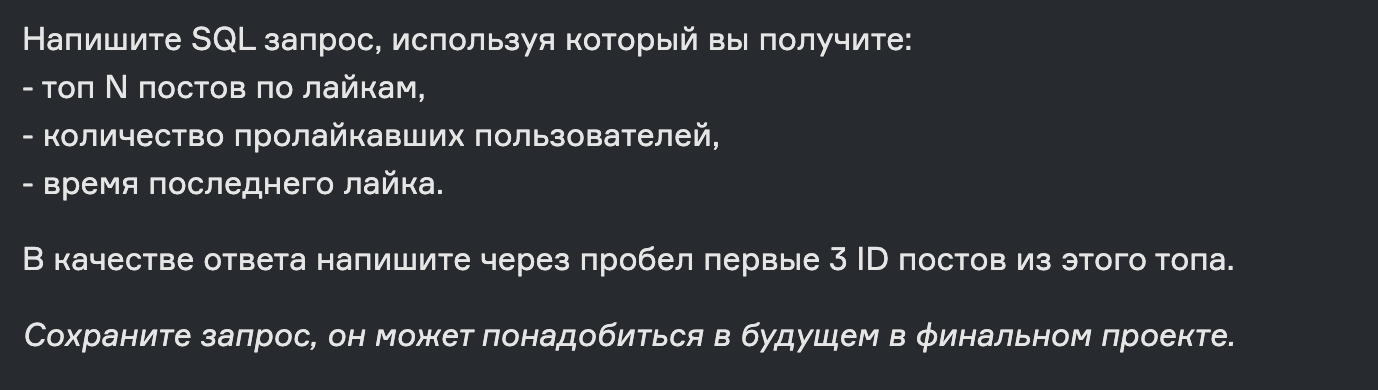

In [53]:
cursor.execute(
    """
    SELECT 
        p.id AS post_id,
        COUNT(f.user_id) AS like_count, 
        COUNT(DISTINCT f.user_id) uniq_like,
        MAX(f.time) last_like_time
    FROM "feed_action" f 
    JOIN "post" p ON p.id = f.post_id
    WHERE f.action = 'like'
    GROUP BY p.id
    ORDER BY like_count DESC
    LIMIT 3;

    """
)## есть условие, которое игнорирует время

# Извлекаем все результаты
result = cursor.fetchall()
for row in result:
    print(row)

(4866, 31714, 31714, datetime.datetime(2022, 1, 1, 13, 57, 43))
(5127, 29637, 29637, datetime.datetime(2022, 1, 5, 13, 52, 17))
(6448, 27939, 27939, datetime.datetime(2022, 1, 22, 5, 50, 39))
